In [1]:
import tensorflow as tf

from algos.convex_naf import ConvexNAFAlgorithm
from algos.ddpg import DDPG as MyDDPG
from qfunctions.convex_naf_qfunction import ConcaveNAF
from qfunctions.nn_qfunction import FeedForwardCritic
from qfunctions.quadratic_naf_qfunction import QuadraticNAF
from qfunctions.quadratic_qf import QuadraticQF
from policies.nn_policy import FeedForwardPolicy
from rllab.exploration_strategies.ou_strategy import OUStrategy

from rllab.envs.box2d.cartpole_env import CartpoleEnv
from rllab.envs.normalized_env import normalize

import matplotlib.pyplot as plt
import numpy as np

In [2]:
BATCH_SIZE = 128
N_EPOCHS = 10
EPOCH_LENGTH = 100
EVAL_SAMPLES = 100
DISCOUNT = 0.99
QF_LEARNING_RATE = 1e-3
POLICY_LEARNING_RATE = 1e-4
BATCH_LEARNING_RATE = 1e-2
SOFT_TARGET_TAU = 1e-2
REPLAY_POOL_SIZE = 1000000
MIN_POOL_SIZE = 256
SCALE_REWARD = 1.0
QF_WEIGHT_DECAY = 0.01
MAX_PATH_LENGTH = 1000
N_UPDATES_PER_TIME_STEP = 5

QF_TYPE = ''

In [3]:
env = normalize(CartpoleEnv())
policy_params = dict(
    observation_hidden_sizes=(100, 100),
    hidden_nonlinearity=tf.nn.relu,
    output_nonlinearity=tf.nn.tanh,
)
algo_params = dict(
    batch_size=BATCH_SIZE,
    n_epochs=N_EPOCHS,
    epoch_length=EPOCH_LENGTH,
    eval_samples=EVAL_SAMPLES,
    discount=DISCOUNT,
    policy_learning_rate=POLICY_LEARNING_RATE,
    qf_learning_rate=QF_LEARNING_RATE,
    soft_target_tau=SOFT_TARGET_TAU,
    replay_pool_size=REPLAY_POOL_SIZE,
    min_pool_size=MIN_POOL_SIZE,
    scale_reward=SCALE_REWARD,
    max_path_length=MAX_PATH_LENGTH,
    qf_weight_decay=QF_WEIGHT_DECAY,
)

es = OUStrategy(env_spec=env.spec)
policy = FeedForwardPolicy(
    name_or_scope="policy",
    env_spec=env.spec,
    **policy_params
)
qf = QuadraticNAF(
    name_or_scope="quadratic_qfunction",
    env_spec=env.spec,
)
# qf = FeedForwardCritic(
#     name_or_scope="feed_forward_qfunction",
#     env_spec=env.spec,
# )
algorithm = MyDDPG(
    env,
    es,
    policy,
    qf,
    **algo_params
)


/Users/vitchyr/git/rail-rl/algos/ddpg.py
qf params =
['quadratic_qfunction/V_function/hidden0/weights:0', 'quadratic_qfunction/V_function/hidden0/bias:0', 'quadratic_qfunction/V_function/hidden1/weights:0', 'quadratic_qfunction/V_function/hidden1/bias:0', 'quadratic_qfunction/V_function/weights:0', 'quadratic_qfunction/V_function/bias:0', 'quadratic_qfunction/implict_policy/hidden0/weights:0', 'quadratic_qfunction/implict_policy/hidden0/bias:0', 'quadratic_qfunction/implict_policy/hidden1/weights:0', 'quadratic_qfunction/implict_policy/hidden1/bias:0', 'quadratic_qfunction/implict_policy/weights:0', 'quadratic_qfunction/implict_policy/bias:0', 'quadratic_qfunction/advantage_function/L/hidden0/weights:0', 'quadratic_qfunction/advantage_function/L/hidden0/bias:0', 'quadratic_qfunction/advantage_function/L/hidden1/weights:0', 'quadratic_qfunction/advantage_function/L/hidden1/bias:0', 'quadratic_qfunction/advantage_function/L/weights:0', 'quadratic_qfunction/advantage_function/L/bias:0']
/

In [4]:
algorithm.train()

2016-12-16 06:11:27.392939 PST | Populating workers...
2016-12-16 06:11:27.394848 PST | Populated
2016-12-16 06:11:27.396694 PST | Epoch #0 | Training started
2016-12-16 06:11:32.748808 PST | Epoch #0 | Training finished. Time: 5.350584030151367
2016-12-16 06:11:32.750002 PST | Epoch #1 | Training started
2016-12-16 06:11:38.340984 PST | Epoch #1 | Training finished. Time: 5.589614152908325
2016-12-16 06:11:38.342405 PST | Epoch #1 | Collecting samples for evaluation


0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:05


2016-12-16 06:11:50.439447 PST | Epoch #1 | Eval time: 12.097042083740234
2016-12-16 06:11:50.442927 PST | ---------------------  -------------
2016-12-16 06:11:50.444591 PST | Epoch                    1
2016-12-16 06:11:50.445967 PST | AverageReturn           77.4438
2016-12-16 06:11:50.447553 PST | QfLoss                  88.0462
2016-12-16 06:11:50.449389 PST | YsMean                   8.85029
2016-12-16 06:11:50.450570 PST | YsStd                    3.17912
2016-12-16 06:11:50.452936 PST | YsMax                    9.99881
2016-12-16 06:11:50.454689 PST | YsMin                    0
2016-12-16 06:11:50.457363 PST | QfOutputMean             0.0240481
2016-12-16 06:11:50.463803 PST | QfOutputStd              0.0087723
2016-12-16 06:11:50.467639 PST | QfOutputMax              0.0478853
2016-12-16 06:11:50.472722 PST | QfOutputMin              0.0117025
2016-12-16 06:11:50.479398 PST | TargetVfOutputMean      -0.000516322
2016-12-16 06:11:50.482022 PST | TargetVfOutputStd        0.000262

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:07


2016-12-16 06:12:12.855256 PST | Epoch #2 | Eval time: 15.464191913604736
2016-12-16 06:12:12.858948 PST | ---------------------  ----------
2016-12-16 06:12:12.860839 PST | Epoch                    2
2016-12-16 06:12:12.862474 PST | AverageReturn           90.8576
2016-12-16 06:12:12.863831 PST | QfLoss                  14.8066
2016-12-16 06:12:12.865442 PST | YsMean                  10.3635
2016-12-16 06:12:12.866986 PST | YsStd                    3.45878
2016-12-16 06:12:12.868756 PST | YsMax                   12.6864
2016-12-16 06:12:12.871941 PST | YsMin                    0
2016-12-16 06:12:12.878457 PST | QfOutputMean            11.0058
2016-12-16 06:12:12.880005 PST | QfOutputStd              1.25896
2016-12-16 06:12:12.881543 PST | QfOutputMax             13.5204
2016-12-16 06:12:12.883046 PST | QfOutputMin              8.07924
2016-12-16 06:12:12.884469 PST | TargetVfOutputMean       1.48352
2016-12-16 06:12:12.886052 PST | TargetVfOutputStd        0.411799
2016-12-16 06:12:1

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:08


2016-12-16 06:12:39.644959 PST | Epoch #3 | Eval time: 18.323570013046265
2016-12-16 06:12:39.648191 PST | ---------------------  ----------
2016-12-16 06:12:39.649528 PST | Epoch                    3
2016-12-16 06:12:39.651133 PST | AverageReturn           74.941
2016-12-16 06:12:39.652556 PST | QfLoss                  23.0473
2016-12-16 06:12:39.654074 PST | YsMean                  14.4688
2016-12-16 06:12:39.655474 PST | YsStd                    5.3666
2016-12-16 06:12:39.656948 PST | YsMax                   18.2828
2016-12-16 06:12:39.658241 PST | YsMin                    0
2016-12-16 06:12:39.659639 PST | QfOutputMean            14.8163
2016-12-16 06:12:39.660923 PST | QfOutputStd              1.76612
2016-12-16 06:12:39.662420 PST | QfOutputMax             17.5553
2016-12-16 06:12:39.663784 PST | QfOutputMin              9.4017
2016-12-16 06:12:39.666543 PST | TargetVfOutputMean       6.47759
2016-12-16 06:12:39.670246 PST | TargetVfOutputStd        0.951351
2016-12-16 06:12:39.6

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:09


2016-12-16 06:13:07.612561 PST | Epoch #4 | Eval time: 18.443989992141724
2016-12-16 06:13:07.614523 PST | ---------------------  ---------
2016-12-16 06:13:07.616170 PST | Epoch                    4
2016-12-16 06:13:07.617735 PST | AverageReturn           73.2742
2016-12-16 06:13:07.619117 PST | QfLoss                  33.7721
2016-12-16 06:13:07.621236 PST | YsMean                  19.1322
2016-12-16 06:13:07.622540 PST | YsStd                    7.19284
2016-12-16 06:13:07.623913 PST | YsMax                   24.9877
2016-12-16 06:13:07.625354 PST | YsMin                    0
2016-12-16 06:13:07.626881 PST | QfOutputMean            17.4873
2016-12-16 06:13:07.628432 PST | QfOutputStd              2.96536
2016-12-16 06:13:07.629956 PST | QfOutputMax             23.329
2016-12-16 06:13:07.631390 PST | QfOutputMin              9.40126
2016-12-16 06:13:07.632966 PST | TargetVfOutputMean      12.0274
2016-12-16 06:13:07.634105 PST | TargetVfOutputStd        1.42804
2016-12-16 06:13:07.63

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:09


2016-12-16 06:13:38.817934 PST | Epoch #5 | Eval time: 21.23113489151001
2016-12-16 06:13:38.820722 PST | ---------------------  ---------
2016-12-16 06:13:38.822156 PST | Epoch                    5
2016-12-16 06:13:38.823518 PST | AverageReturn          101.055
2016-12-16 06:13:38.824662 PST | QfLoss                  28.2077
2016-12-16 06:13:38.825800 PST | YsMean                  24.2602
2016-12-16 06:13:38.826944 PST | YsStd                    8.18322
2016-12-16 06:13:38.828220 PST | YsMax                   31.4696
2016-12-16 06:13:38.829416 PST | YsMin                    0
2016-12-16 06:13:38.830698 PST | QfOutputMean            21.7205
2016-12-16 06:13:38.831877 PST | QfOutputStd              5.40554
2016-12-16 06:13:38.833061 PST | QfOutputMax             28.6864
2016-12-16 06:13:38.834251 PST | QfOutputMin              8.70546
2016-12-16 06:13:38.835485 PST | TargetVfOutputMean      17.1014
2016-12-16 06:13:38.836767 PST | TargetVfOutputStd        3.10451
2016-12-16 06:13:38.838

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:15


2016-12-16 06:14:19.626079 PST | Epoch #6 | Eval time: 27.75701379776001
2016-12-16 06:14:19.627816 PST | ---------------------  ---------
2016-12-16 06:14:19.631290 PST | Epoch                    6
2016-12-16 06:14:19.632754 PST | AverageReturn          105.501
2016-12-16 06:14:19.635057 PST | QfLoss                  31.1713
2016-12-16 06:14:19.636499 PST | YsMean                  27.5951
2016-12-16 06:14:19.639670 PST | YsStd                    9.73921
2016-12-16 06:14:19.641138 PST | YsMax                   37.4868
2016-12-16 06:14:19.642944 PST | YsMin                    0
2016-12-16 06:14:19.644776 PST | QfOutputMean            23.9919
2016-12-16 06:14:19.647702 PST | QfOutputStd              7.4655
2016-12-16 06:14:19.649939 PST | QfOutputMax             35.4622
2016-12-16 06:14:19.651384 PST | QfOutputMin              4.83256
2016-12-16 06:14:19.653031 PST | TargetVfOutputMean      20.9031
2016-12-16 06:14:19.662303 PST | TargetVfOutputStd        5.06059
2016-12-16 06:14:19.6642

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:14


2016-12-16 06:15:05.371421 PST | Epoch #7 | Eval time: 33.81864881515503
2016-12-16 06:15:05.385115 PST | ---------------------  ---------
2016-12-16 06:15:05.388362 PST | Epoch                    7
2016-12-16 06:15:05.399726 PST | AverageReturn           90.9442
2016-12-16 06:15:05.404328 PST | QfLoss                  31.7837
2016-12-16 06:15:05.406730 PST | YsMean                  29.7737
2016-12-16 06:15:05.419769 PST | YsStd                   12.1055
2016-12-16 06:15:05.421201 PST | YsMax                   43.6175
2016-12-16 06:15:05.422931 PST | YsMin                    0
2016-12-16 06:15:05.429811 PST | QfOutputMean            26.028
2016-12-16 06:15:05.432989 PST | QfOutputStd              9.41728
2016-12-16 06:15:05.436206 PST | QfOutputMax             39.2785
2016-12-16 06:15:05.437553 PST | QfOutputMin              5.65145
2016-12-16 06:15:05.439086 PST | TargetVfOutputMean      24.0674
2016-12-16 06:15:05.440821 PST | TargetVfOutputStd        7.45987
2016-12-16 06:15:05.4449

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:13


2016-12-16 06:15:50.739205 PST | Epoch #8 | Eval time: 29.216986894607544
2016-12-16 06:15:50.741683 PST | ---------------------  ---------
2016-12-16 06:15:50.743384 PST | Epoch                    8
2016-12-16 06:15:50.745040 PST | AverageReturn          133.704
2016-12-16 06:15:50.746618 PST | QfLoss                  39.3503
2016-12-16 06:15:50.748020 PST | YsMean                  34.8683
2016-12-16 06:15:50.749800 PST | YsStd                   12.6825
2016-12-16 06:15:50.751252 PST | YsMax                   47.2845
2016-12-16 06:15:50.752838 PST | YsMin                    0
2016-12-16 06:15:50.754522 PST | QfOutputMean            30.2659
2016-12-16 06:15:50.756276 PST | QfOutputStd             10.3148
2016-12-16 06:15:50.758115 PST | QfOutputMax             43.612
2016-12-16 06:15:50.759686 PST | QfOutputMin              0.40583
2016-12-16 06:15:50.761096 PST | TargetVfOutputMean      28.2784
2016-12-16 06:15:50.763678 PST | TargetVfOutputStd        8.65616
2016-12-16 06:15:50.76498

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:12


2016-12-16 06:16:33.334374 PST | Epoch #9 | Eval time: 27.687718152999878
2016-12-16 06:16:33.338241 PST | ---------------------  ---------
2016-12-16 06:16:33.341057 PST | Epoch                    9
2016-12-16 06:16:33.343761 PST | AverageReturn           81.7581
2016-12-16 06:16:33.348045 PST | QfLoss                  34.1521
2016-12-16 06:16:33.353612 PST | YsMean                  32.5291
2016-12-16 06:16:33.355210 PST | YsStd                   14.8821
2016-12-16 06:16:33.360120 PST | YsMax                   54.0139
2016-12-16 06:16:33.362620 PST | YsMin                    0
2016-12-16 06:16:33.366119 PST | QfOutputMean            30.5457
2016-12-16 06:16:33.368745 PST | QfOutputStd             11.4248
2016-12-16 06:16:33.369931 PST | QfOutputMax             50.3273
2016-12-16 06:16:33.371703 PST | QfOutputMin              2.44546
2016-12-16 06:16:33.373093 PST | TargetVfOutputMean      28.0573
2016-12-16 06:16:33.374287 PST | TargetVfOutputStd       10.3584
2016-12-16 06:16:33.3757

In [4]:
a_dim = qf.action_dim
o_dim = qf.observation_dim
o_high = env.spec.action_space.high[0]
o_low = env.spec.action_space.low[0]
print(a_dim)
print(o_dim)
print(o_high)
print(o_low)

1
4
1.0
-1.0


# Plot QF

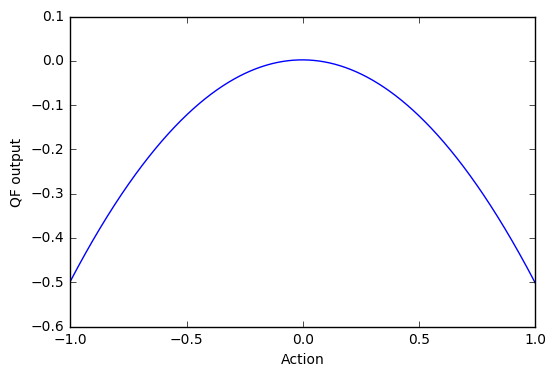

In [5]:
num_actions = 10000

actions = np.linspace(-1, 1, num_actions)
actions = np.expand_dims(actions, axis=1)
random_state_single = np.random.rand(1, o_dim)
random_state = np.vstack([random_state_single for _ in range(num_actions)])

feed_dict = {
    qf.action_input: actions,
    qf.observation_input: random_state,
}
qf_output = qf.sess.run(
    qf.output,
    feed_dict=feed_dict
)

plt.plot(actions, qf_output)
plt.xlabel('Action')
plt.ylabel('QF output')
plt.show()

# Inspect correctness of this quadratic function

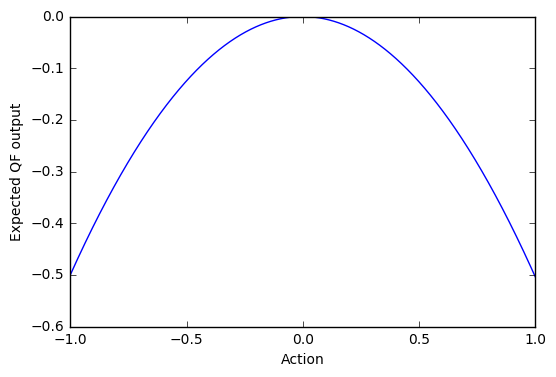

In [8]:
feed_dict = {
    qf.action_input: actions,
    qf.observation_input: random_state,
}
L_params, L, implicit_policy_output = qf.sess.run(
    [qf.advantage_function.L_params.output, qf.advantage_function.L, qf.implicit_policy.output],
    feed_dict=feed_dict
)

expected_values = -0.5 * ((actions - implicit_policy_output) * L[0][0][0])**2
plt.plot(actions, expected_values)
plt.xlabel('Action')
plt.ylabel('Expected QF output')
plt.show()

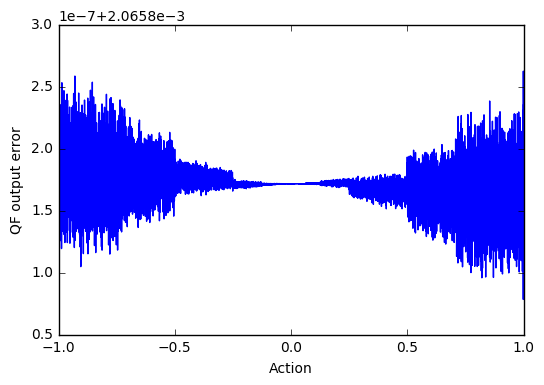

In [9]:
plt.plot(actions, np.abs(expected_values - qf_output))
plt.xlabel('Action')
plt.ylabel('QF output error')
plt.show()

Make sure diagonal values are exponentiated corrected

In [10]:
print(L[0])
print(np.exp(L_params[0]))

[[ 1.00206447]]
[ 1.00206447]


Make sure max action is the one taken by the implicit policy

In [11]:
max_index = np.argmax(qf_output, axis=0)
print(actions[max_index])
print(implicit_policy_output[0])

[[-0.00170017]]
[-0.00172733]


# Plot implicit policy

[[-1.         -0.82389087 -0.80812783  0.43626707]
 [-0.997998   -0.82389087 -0.80812783  0.43626707]
 [-0.995996   -0.82389087 -0.80812783  0.43626707]
 ..., 
 [ 0.995996   -0.82389087 -0.80812783  0.43626707]
 [ 0.997998   -0.82389087 -0.80812783  0.43626707]
 [ 1.         -0.82389087 -0.80812783  0.43626707]]


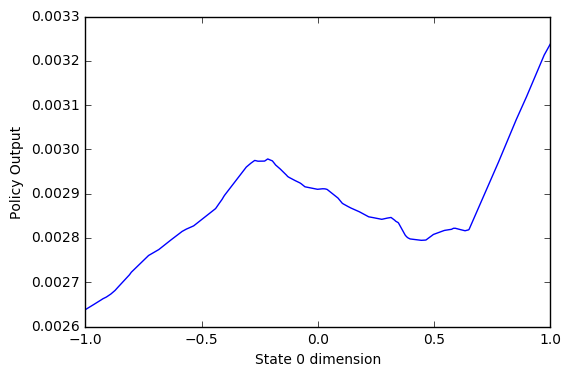

[[-0.78974319 -1.          0.85785328 -0.08952871]
 [-0.78974319 -0.997998    0.85785328 -0.08952871]
 [-0.78974319 -0.995996    0.85785328 -0.08952871]
 ..., 
 [-0.78974319  0.995996    0.85785328 -0.08952871]
 [-0.78974319  0.997998    0.85785328 -0.08952871]
 [-0.78974319  1.          0.85785328 -0.08952871]]


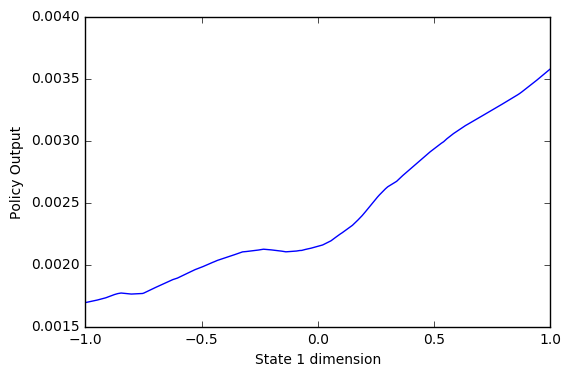

[[-0.4111008  -0.65743232 -1.          0.39297336]
 [-0.4111008  -0.65743232 -0.997998    0.39297336]
 [-0.4111008  -0.65743232 -0.995996    0.39297336]
 ..., 
 [-0.4111008  -0.65743232  0.995996    0.39297336]
 [-0.4111008  -0.65743232  0.997998    0.39297336]
 [-0.4111008  -0.65743232  1.          0.39297336]]


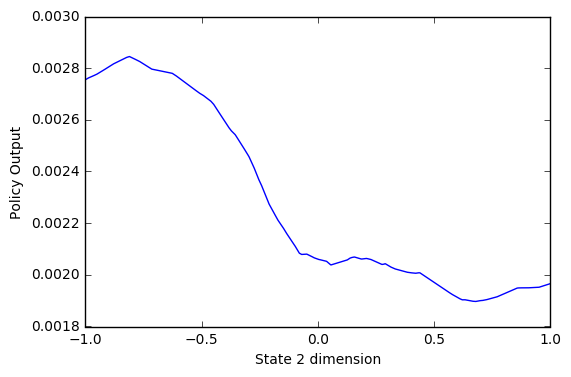

[[ 0.65124284 -0.43456919  0.8696696  -1.        ]
 [ 0.65124284 -0.43456919  0.8696696  -0.997998  ]
 [ 0.65124284 -0.43456919  0.8696696  -0.995996  ]
 ..., 
 [ 0.65124284 -0.43456919  0.8696696   0.995996  ]
 [ 0.65124284 -0.43456919  0.8696696   0.997998  ]
 [ 0.65124284 -0.43456919  0.8696696   1.        ]]


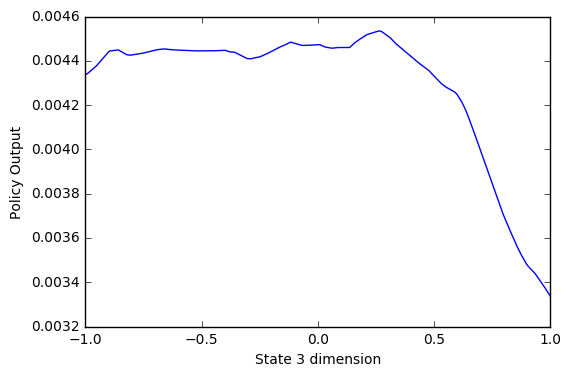

In [12]:
o_delta = o_high - o_low
for dim_changing in range(4):
    num_states = 1000
    base_state = np.random.rand(1, o_dim) * o_delta + o_low
#     base_state = np.zeros((1, o_dim))
    linear_states = np.vstack([base_state for _ in range(num_states)])
    linear_states[:, dim_changing] = np.linspace(o_low, o_high, num_states)
    print(linear_states)
    
    policy_output = np.vstack([policy.get_action(state)[0] for state in linear_states])
    
    plt.plot(linear_states[:, dim_changing], policy_output)
    plt.xlabel('State {0} dimension'.format(dim_changing))
    plt.ylabel('Policy Output')
    plt.show()